This script converts <a href="https://scedc.caltech.edu/data/deeplearning.html#signal_noise">meier</a> dataset waveforms to a dataset, compatible with <a href="https://github.com/interseismic/generalized-phase-detection">gpd california</a> data.

In [1]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import obspy.core as oc

In [2]:
# Modifying sys.path to be able to load project packages
import sys
sys.path.append('../')

In [4]:
# Load project packages
from utils.h5_tools import write_batch

# Function Definitions

In [3]:
def convert_data(dataset, idx):
    """
    Converts data from meier format to requiered:
        1. Detrend.
        2. 2Hz highpass filtering.
        3. Slice.
        4. Local absolute max normalization.
    """
    # Get data
    data = dataset[:, idx, :]
    channels = [data[i, :] for i in range(data.shape[0])]
    
    d_length = data.shape[1]
    r_length = 400
    ch_num = len(channels)
    
    X = np.zeros((d_length, ch_num))
    
    # Process
    for i, chan in enumerate(channels):
        
        trace = oc.Trace(data = chan)
        trace.stats.sampling_rate = 100
        
        trace.detrend(type = 'linear')
        trace.filter(type = 'highpass', freq = 2.)
        
        X[:, i] = trace.data
        
    # Slice
    X = X[:r_length, :]
    
    # Normalize
    global_norm = True
    
    if global_norm:
        
        loc_max = np.max(np.abs(X[:, :]))
        X[:, :] = X[:, :] / loc_max
        
    else:
        
        for i in range(ch_num):

            loc_max = np.max(np.abs(X[:, i]))
            X[:, i] = X[:, i] / loc_max
        
    return X.reshape((1, *X.shape))

In [4]:
def plot_original(dataset, idx):
    """
    Plots original data.
    """
    
    # Get data
    data = dataset[:, idx, :]
    channels = [data[i, :] for i in range(data.shape[0])]
    
    ch_num = len(channels)
    
    # Plot init
    fig = plt.figure(figsize = (9, 4), dpi = 80)
    axes = fig.subplots(ch_num, sharex = True)
    
    # ScalarFormatter params
    from matplotlib.ticker import ScalarFormatter
    
    formatter_params = {
        'useOffset': False,
        'useMathText': True
    }
    
    
    for i, ax in enumerate(axes):
        
        ax.plot(channels[i])  # plot data
        
        # Set ScalarFormatter for neat Y-axis labels
        formatter = ScalarFormatter(**formatter_params)
        formatter.set_scientific(True)
        ax.yaxis.set_major_formatter(formatter)
        ax.ticklabel_format(axis = 'y', scilimits = (-3, 3))  # set scientific notation for < 10^(-3) and > 10^3

    fig.tight_layout()

In [5]:
def plot_converted(data):
    """
    Plots converted data.
    """
    
    ch_num = data.shape[2]
    
    # Plot init
    fig = plt.figure(figsize = (9, 4), dpi = 80)
    axes = fig.subplots(ch_num, sharex = True)
    
    # ScalarFormatter params
    from matplotlib.ticker import ScalarFormatter
    
    formatter_params = {
        'useOffset': False,
        'useMathText': True
    }
    
    
    for i, ax in enumerate(axes):
        
        ax.plot(data[0, :, i])  # plot data
        
        # Set ScalarFormatter for neat Y-axis labels
        formatter = ScalarFormatter(**formatter_params)
        formatter.set_scientific(True)
        ax.yaxis.set_major_formatter(formatter)
        ax.ticklabel_format(axis = 'y', scilimits = (-3, 3))  # set scientific notation for < 10^(-3) and > 10^3

    fig.tight_layout()

# Convert dataset

## Initialize Parameters

In [6]:
meier_path = 'E:/Data/seisan/datasets/onsetWforms_meier19jgr_pub1_0_woJP.h5'
save_path = 'E:/Data/seisan/datasets/meier_converted_global_norm.h5'

meier_set_names_stack = ['noise', 'wforms']

batch_size = 10000

label = 2
_id = 'meier_noise'

## Convertion

In [7]:
meier_set = h5.File(meier_path, 'r')

for s_name in meier_set_names_stack:
    meier_set = meier_set[s_name]

In [8]:
# Set shape: (channel, waveform, sample)
# Required shape: (waveform, sample, channel)
meier_set

<HDF5 dataset "wforms": shape (3, 945571, 601), type "<f8">

In [ ]:
b = 0

X = np.zeros((batch_size, 400, 3))
Y = np.full(batch_size, label, dtype = int)
Z = np.full(batch_size, _id, dtype = object)

for i in range(160000, meier_set.shape[1]):
    
    if not i % 100:
        print('idx: ', i)
        
    X[b] = convert_data(meier_set, i)
    
    b += 1
    
    if b == batch_size:
        
        b = 0
        
        write_batch(save_path, 'X', X)
        write_batch(save_path, 'Y', Y)
        write_batch(save_path, 'Z', Z, string = True)
        
        X = np.zeros((batch_size, 400, 3))
        
        print('BATCH SAVED')

idx:  160000
idx:  160100
idx:  160200
idx:  160300
idx:  160400
idx:  160500
idx:  160600
idx:  160700
idx:  160800
idx:  160900
idx:  161000
idx:  161100
idx:  161200
idx:  161300
idx:  161400
idx:  161500
idx:  161600
idx:  161700
idx:  161800
idx:  161900
idx:  162000
idx:  162100
idx:  162200
idx:  162300
idx:  162400
idx:  162500
idx:  162600
idx:  162700
idx:  162800
idx:  162900
idx:  163000
idx:  163100
idx:  163200
idx:  163300
idx:  163400
idx:  163500
idx:  163600
idx:  163700
idx:  163800
idx:  163900
idx:  164000
idx:  164100
idx:  164200
idx:  164300
idx:  164400
idx:  164500
idx:  164600
idx:  164700
idx:  164800
idx:  164900
idx:  165000
idx:  165100
idx:  165200
idx:  165300
idx:  165400
idx:  165500
idx:  165600
idx:  165700
idx:  165800
idx:  165900
idx:  166000
idx:  166100
idx:  166200
idx:  166300
idx:  166400
idx:  166500
idx:  166600
idx:  166700
idx:  166800
idx:  166900
idx:  167000
idx:  167100
idx:  167200
idx:  167300
idx:  167400
idx:  167500
idx:  167600

idx:  222500
idx:  222600
idx:  222700
idx:  222800
idx:  222900
idx:  223000
idx:  223100
idx:  223200
idx:  223300
idx:  223400
idx:  223500
idx:  223600
idx:  223700
idx:  223800
idx:  223900
idx:  224000
idx:  224100
idx:  224200
idx:  224300
idx:  224400
idx:  224500
idx:  224600
idx:  224700
idx:  224800
idx:  224900
idx:  225000
idx:  225100
idx:  225200
idx:  225300
idx:  225400
idx:  225500
idx:  225600
idx:  225700
idx:  225800
idx:  225900
idx:  226000
idx:  226100
idx:  226200
idx:  226300
idx:  226400
idx:  226500
idx:  226600
idx:  226700
idx:  226800
idx:  226900
idx:  227000
idx:  227100
idx:  227200
idx:  227300
idx:  227400
idx:  227500
idx:  227600
idx:  227700
idx:  227800
idx:  227900
idx:  228000
idx:  228100
idx:  228200
idx:  228300
idx:  228400
idx:  228500
idx:  228600
idx:  228700
idx:  228800
idx:  228900
idx:  229000
idx:  229100
idx:  229200
idx:  229300
idx:  229400
idx:  229500
idx:  229600
idx:  229700
idx:  229800
idx:  229900
BATCH SAVED
idx:  230000


In [ ]:
if b:
    
    write_batch(save_path, 'X', X[:b])
    write_batch(save_path, 'Y', Y[:b])
    write_batch(save_path, 'Z', Z[:b], string = True)

In [112]:
idx = 15

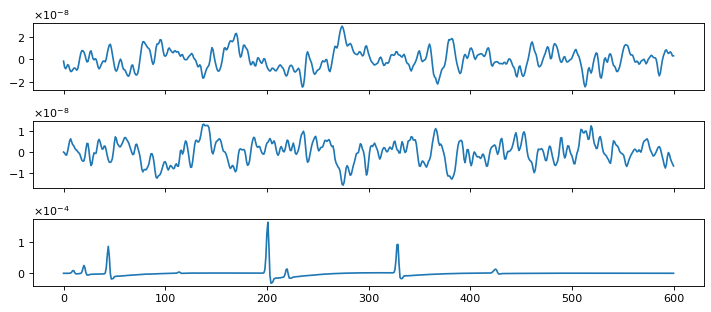

In [113]:
plot_original(meier_set, idx)

In [114]:
c_data = convert_data(meier_set, idx)

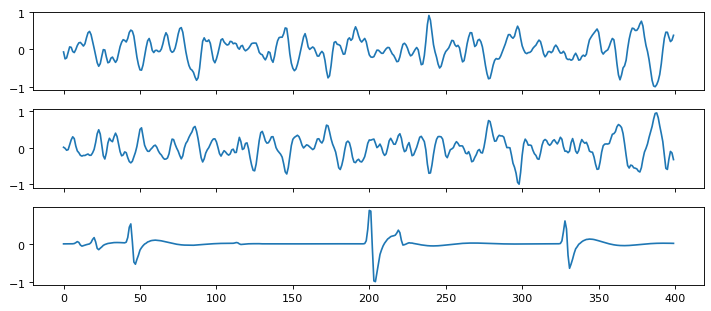

In [115]:
plot_converted(c_data)

In [127]:
f

<HDF5 file "meier_converted.h5" (mode r)>

In [128]:
X = f['X']
Y = f['Y']
Z = f['Z']

In [129]:
write_batch('meier_gpd', 'X', X)
write_batch('meier_gpd', 'Y', Y)
write_batch('meier_gpd', 'Z', Z, string = True)